# 1. Flowchart 

Write a function `Print_values` with arguments `a`, `b`, and `c` to reflect the following flowchart. Here the purple parallelogram operator on a list `[x, y, z]` is to compute and print `x+y-10z`. Try your output with some random `a`, `b`, and `c` values. Report your output when `a = 10, b = 5, c = 1`.

<img src="figs/flowchart_a1.png" alt="drawing" width="500"/>

In [13]:
def Print_values(a, b, c):
    if a > b:
        if b > c:
            purple_parallelogram_operator(a, b, c)
        elif a > c:
            purple_parallelogram_operator(a, c, b)
        else:
            purple_parallelogram_operator(c, a, b)
    elif not b > c:
        purple_parallelogram_operator(c, b, a)

def purple_parallelogram_operator(x, y, z):
    print( x + y - 10 * z )

Print_values(10, 5, 1) # branch 4
Print_values(2, 2, 2) # branch 1
Print_values(144, 22, -8) # branch 3
Print_values(5566, 875, 5566) # branch  2

5
-16
246
2382


# 2. Continuous ceiling function

Given a list with `N` positive integers. For every element `x` of the list, find the value of continuous ceiling function defined as `F(x) = F(ceil(x/3)) + 2x`, where `F(1) = 1`. 

In [7]:
import math

def memoized_ceiling_function(x):
    if x == 1:
        return 1
    return memoized_ceiling_function(math.ceil(x/3)) + 2*x

def calculate_F_values(numbers):
    results = []
    for number in numbers:
        results.append(memoized_ceiling_function(number))
    return results

numbers = [1, 2, 3, 4, 5, 100]  # Example list of positive integers
F_values = calculate_F_values(numbers)
print("Input list: ",numbers)
print("Output list: ",F_values) 

Input list:  [1, 2, 3, 4, 5, 100]
Output list:  [1, 5, 7, 13, 15, 305]


# 3. Dice rolling

**3.1** Given `10` dice each with `6` faces, numbered from `1` to `6`. Write a function `Find_number_of_ways` to find the number of ways to get sum `x`, defined as the sum of values on each face when all the dice are thrown.

**3.2** Count the number of ways for any `x` from `10` to `60`, assign the number of ways to a list called `Number_of_ways`, so which `x` yields the maximum of `Number_of_ways`?


In [17]:
def Find_number_of_ways(target_sum):
    dp = [[0] * (target_sum) for _ in range(10)] # dim: 10 * target_sum
    for i in range(6):    # 一个筛子时，只能是 1-6
        dp[0][i] = 1

    for i in range(1, 10):
        for j in range(1, target_sum):
            dp[i][j] = 0
            for k in range(1, min(6, j)+1):
                dp[i][j] += dp[i - 1][j - k]

    return dp[-1][target_sum-1]

def find_max_number_of_ways():
    # 或者拿 dp[-1]
    number_of_ways = [Find_number_of_ways(x) for x in range(10, 61)]
    print(number_of_ways)
    max_ways = max(number_of_ways)
    max_sum = number_of_ways.index(max_ways) + 10
    return max_sum, max_ways

max_sum, max_ways = find_max_number_of_ways()
print(f"The sum that yields the maximum number of ways is {max_sum} with {max_ways} ways.")

[1, 10, 55, 220, 715, 2002, 4995, 11340, 23760, 46420, 85228, 147940, 243925, 383470, 576565, 831204, 1151370, 1535040, 1972630, 2446300, 2930455, 3393610, 3801535, 4121260, 4325310, 4395456, 4325310, 4121260, 3801535, 3393610, 2930455, 2446300, 1972630, 1535040, 1151370, 831204, 576565, 383470, 243925, 147940, 85228, 46420, 23760, 11340, 4995, 2002, 715, 220, 55, 10, 1]
The sum that yields the maximum number of ways is 35 with 4395456 ways.


# 4. Dynamic programming

**4.1 [5 points]** Write a function `Random_integer` to fill an array of `N` elements by randomly selecting integers from `0` to `10`.

**4.2 [15 points]** Write a function `Sum_averages` to compute the sum of the average of all subsets of the array. For example, given an array of `[1, 2, 3]`, you `Sum_averages` function should compute the sum of: average of `[1]`, average of `[2]`, average of `[3]`,  average of `[1, 2]`, average of `[1, 3]`, average of `[2, 3]`, and average of `[1, 2, 3]`.  

**4.3 [5 points]** Call `Sum_averages` with `N` increasing from `1` to `100`, assign the output to a list called `Total_sum_averages`. Plot `Total_sum_averages`, describe what you see.


[1, 10, 5, 9, 3, 0, 8, 2, 9, 5]
142.6


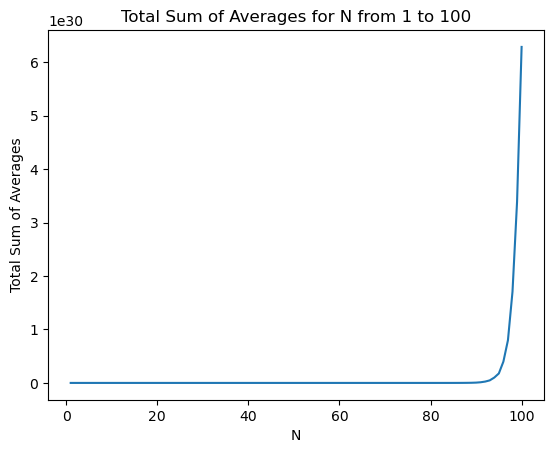

In [6]:
import random
import math
import matplotlib.pyplot as plt

# 4.1
def Random_integer(N):
    return [random.randint(0, 10) for _ in range(N)]

print(Random_integer(10))

# 4.2
def Sum_averages(arr): 
    sum_value = 0
    for i in range(len(arr)):
        binomial_coefficient = math.comb(len(arr)-1, i)
        sum_value += binomial_coefficient / (i + 1)
    return sum(arr) * sum_value

arr = [1, 2, 6, 6, 8]
print(Sum_averages(arr))

# 4.3
Total_sum_averages = []
# Calculate the sum of averages for each N from 1 to 100
for N in range(1, 101):
    arr = Random_integer(N)
    Total_sum_averages.append(Sum_averages(arr))

# Plot the Total_sum_averages
plt.plot(range(1, 101), Total_sum_averages)
plt.xlabel('N')
plt.ylabel('Total Sum of Averages')
plt.title('Total Sum of Averages for N from 1 to 100')
plt.show()

# 5. Path counting

**5.1 [5 points]** Create a matrix with `N` rows and `M` columns, fill the right-bottom corner and top-left corner cells with `1`, and randomly fill the rest of matrix with integer `0` or `1`.

**5.2 [25 points]** Consider a cell marked with `0` as a blockage or dead-end, and a cell marked with `1` is good to go. Write a function `Count_path` to count the total number of paths to reach the right-bottom corner cell from the top-left corner cell. 

**Notice:** for a given cell, you are **only allowed** to move either rightward or downward.

**5.3 [5 points]** Let `N = 10, M = 8`, run `Count_path` for `1000` times, each time the matrix (except the right-bottom corner and top-left corner cells, which remain being `1`) is re-filled with integer `0` or `1` randomly, report the mean of total number of paths from the `1000` runs.

In [37]:
# 5. Path counting
# 5.1 Create a matrix
import numpy as np

def generate_matrix(N, M):
    # Without numpy
    arr = [[random.randint(0,1)] * (M) for _ in range(N)]
    arr[0][0]=1
    arr[N-1][M-1]=1

    # With numpy
    arr=np.random.randint(2,size=(N,M))
    arr[0,0]=1
    arr[N-1,M-1]=1
    return arr

# 5.2 Count_path function with numpy
def Count_path(matrix):
    N, M = matrix.shape[0], matrix.shape[1]
    count = np.zeros((N,M))
    pos_row = np.where(matrix[0] == 0)[0] # 第一行中第一个0的位置,找不到则为M
    pos_col = np.where(matrix[:,0] == 0)[0] # 列
    pos_row = pos_row[0] if pos_row.size>0 else M
    pos_col = pos_col[0] if pos_col.size>0 else N
    count[0,:pos_row] = 1
    count[:pos_col,0] = 1
    for i in range(1, N):
        for j in range(1, M):
            if matrix[i, j] == 0:
                count[i, j] = 0
            else:
                count[i, j] = count[i-1, j] + count[i, j-1]
    return count[-1][-1]

arr = generate_matrix(N=5, M=8)
print(arr)
print("The Count_path value of the matrix above is",Count_path(arr))

# 5.3 Count_path function
# Calculate the mean pathway number for 1000 runs by refilling new random matrix
sum_path=0
for k in range(1000):
    sum_path += Count_path(generate_matrix(N=10, M=8))
print("The mean of Count_path for matrixes with size(10,8) from the 1000 runs is\n", sum_path/1000)    

[[1 1 1 0 1 0 1 1]
 [1 0 1 1 1 1 1 0]
 [0 0 0 1 0 1 0 1]
 [1 0 0 1 1 0 1 0]
 [0 0 1 1 1 1 1 1]]
The Count_path value of the matrix above is 2.0
The mean of Count_path for matrixes with size(10,8) from the 1000 runs is
 0.633
